In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#load file
jumia = pd.read_csv("./jumia.csv", encoding="utf-16", na_values="?", index_col=False, quotechar="'")
jumia.tail(n=10)

,item,price,discount,category
50,"LG LED Smart TV 43"" inch LM6300 Series Full HD...","₦ 171,490",3%,Televisions
51,"Hisense 65"" UHD 4k SMART LED TV +WIFI AND WALL...","₦ 375,000",13%,Televisions
52,TCL 50-Inch 4k UHD Android Smart TV,"₦ 266,801",12%,Televisions
53,Hisense 55” A7100F UHD TV,"₦ 278,900",NaN,Televisions
54,Fashion Striped Runing Short Sleeve Outdoor Sp...,"₦ 7,750",40%,Jerseys
55,Adidas Arsenal Home Jersey,"₦ 8,500",NaN,Jerseys
56,Quick Dry Fashion Runing Short Sleeve Outdoor ...,"₦ 7,750",40%,Jerseys
57,Sports Gradient Stripe Short Sleeve Tshirt Men...,"₦ 6,750",40%,Jerseys
58,Sports Suit T-shirt Shorts Kids Men Women Socc...,"₦ 7,850",40%,Jerseys
59,Sports 3D Short Sleeve T-shirt Shorts Men Socc...,"₦ 8,350",40%,Jerseys


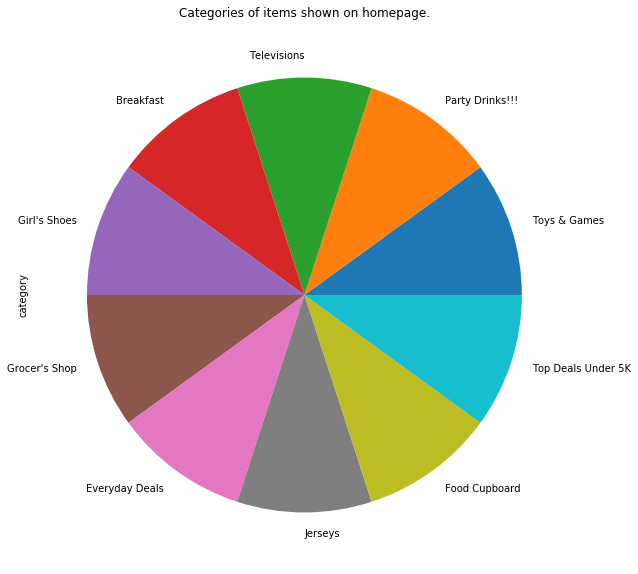

In [70]:
cat = jumia['category'].value_counts()
cat.plot(kind="pie", figsize=(10,10));
plt.title("Categories of items shown on homepage.");
#plt.xlabel("Number of items");

## The number of items shown on homepage are same

In [23]:
jumia.loc[jumia["discount"].isnull(), "discount"] = '0%'

In [24]:
jumia.tail(n=10)

,item,price,discount,category
50,"LG LED Smart TV 43"" inch LM6300 Series Full HD...","₦ 171,490",3%,Televisions
51,"Hisense 65"" UHD 4k SMART LED TV +WIFI AND WALL...","₦ 375,000",13%,Televisions
52,TCL 50-Inch 4k UHD Android Smart TV,"₦ 266,801",12%,Televisions
53,Hisense 55” A7100F UHD TV,"₦ 278,900",0%,Televisions
54,Fashion Striped Runing Short Sleeve Outdoor Sp...,"₦ 7,750",40%,Jerseys
55,Adidas Arsenal Home Jersey,"₦ 8,500",0%,Jerseys
56,Quick Dry Fashion Runing Short Sleeve Outdoor ...,"₦ 7,750",40%,Jerseys
57,Sports Gradient Stripe Short Sleeve Tshirt Men...,"₦ 6,750",40%,Jerseys
58,Sports Suit T-shirt Shorts Kids Men Women Socc...,"₦ 7,850",40%,Jerseys
59,Sports 3D Short Sleeve T-shirt Shorts Men Socc...,"₦ 8,350",40%,Jerseys


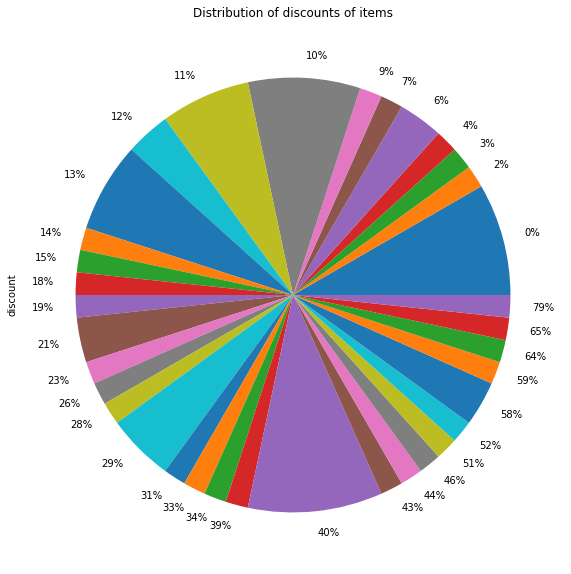

In [37]:
discount = jumia["discount"].value_counts()
discount = discount[sorted(discount.index, key=lambda x : int(x.strip('%')))]
discount.plot(kind="pie", figsize=(10,10));
plt.title("Distribution of discounts of items");

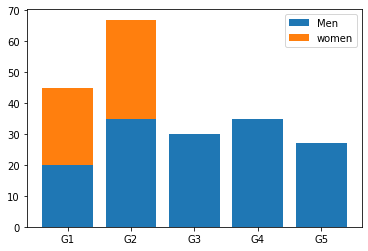

In [50]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
n = [20, 35, 30, 35, 27]
j = [25, 32, 0, 0, 0]
fig, ax = plt.subplots()
ax.bar(labels, n, label="Men")
ax.bar(labels, j, bottom=n, label="women")
ax.legend()

In [93]:
category_names = cat.index
s = []
for c in category_names:
    j = jumia[jumia["category"]==c]
    l = []
    for d in discount.index:
        l.append(len(j[j["discount"]==d]))
        #if len(j[j["discount"]==d]):
        #    l.append(int(d.strip('%')))
        #else: l.append(0)
    s.append(l)

In [72]:
category_names = cat.index
category_names

Index(['Toys & Games', 'Party Drinks!!!', 'Televisions', 'Breakfast',
       'Girl's Shoes', 'Grocer's Shop', 'Everyday Deals', 'Jerseys',
       'Food Cupboard', 'Top Deals Under 5K'],
      dtype='object')

In [77]:
j = jumia[jumia["category"]=='Toys & Games']
#j
len(j[j["discount"]=="29%"])

2

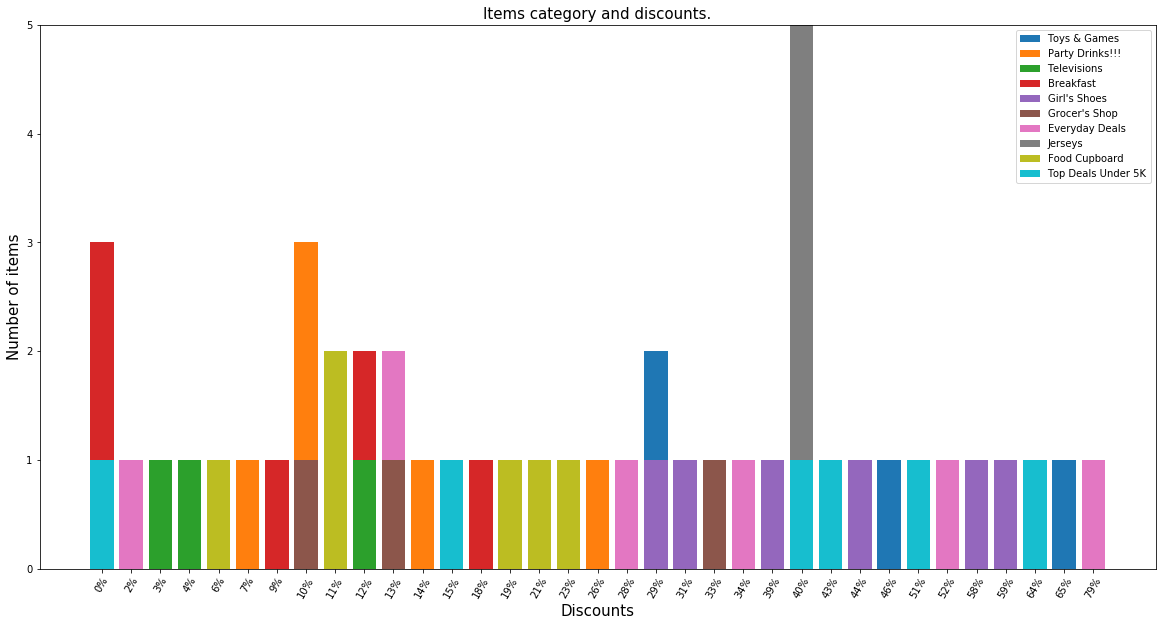

In [107]:
labels = cat.index
l = [f"D{i}" for i in range(1,len(discount.index)+1)]
fig, ax = plt.subplots(figsize=(20,10))
for i,arr in enumerate(s):
    if i==0: ax.bar(l, arr, label=labels[i])
    else: ax.bar(l, arr, bottom=s[i-1], label=labels[i])
ax.legend()
ax.set_xlabel("Discounts", fontsize=15)
ax.set_ylabel("Number of items", fontsize=15)
ax.set_xticklabels(discount.index, rotation=60);
ax.set_title("Items category and discounts.", fontsize=15);